In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [98]:
import numpy as np

In [80]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
df = pd.read_excel('Data Analyst Interview.xlsx')

In [18]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [19]:
df_copy = df.copy()

In [20]:
df_copy.head()

,orderId,userId,age,orderDate,regimenId,salePrice,cost,profit,margin,paymentType,stage,Order Type,concern,transitstage,Plan name
0,QndTdGHg5A,U05t13GiEy,20.0,2020-11-08,v4_302_personalized_005t13GiEy,1499.0,254.0,1245.0,0.830554,COD,DELIVERED,REGIMEN,unknown,DELIVERED,v4_302_personalize
1,gU3Kd1xbIq,U05t13GiEy,20.0,2020-11-17,NaN,599.0,128.0,471.0,0.786311,COD,DELIVERED,PRODUCT,unknown,DELIVERED,NaN
2,MH4eOBiuc3,U0A0LG566j,17.0,2020-04-29,v4_221_personalized_00A0LG566j,1499.0,472.0,1027.0,0.685123,COD,DELIVERED,REGIMEN,unknown,DELIVERED,v4_221_personalize
3,r3ygU75FPQ,U0AToza87a,18.0,2020-07-01,v4_102_alternate_11_personalized_00AToza87a,1099.0,252.0,847.0,0.770701,COD,DELIVERED,REGIMEN,unknown,DELIVERED,v4_102_alternate_1
4,IGcUV6iFY7,U0DigsMEFz,34.0,2021-03-05,v4_9991_personalized_00DigsMEFz,999.0,359.0,640.0,0.640641,COD,DELIVERED,REGIMEN,unknown,DELIVERED,v4_9991_personaliz


In [21]:
df_copy.columns

Index(['orderId', 'userId', 'age', 'orderDate', 'regimenId', 'salePrice',
       'cost', 'profit', 'margin', 'paymentType', 'stage', 'Order Type',
       'concern', 'transitstage', 'Plan name'],
      dtype='object')

In [22]:
df_copy.columns = ['orderID', 'userID', 'age', 'order_date', 'regimenID', 'sale_price',
       'cost', 'profit', 'margin', 'payment_type', 'stage', 'order_type',
       'concern', 'transitstage', 'plan_name']

In [23]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28905 entries, 0 to 28904
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   orderID       28905 non-null  object 
 1   userID        28905 non-null  object 
 2   age           28812 non-null  float64
 3   order_date    28905 non-null  object 
 4   regimenID     26961 non-null  object 
 5   sale_price    28905 non-null  float64
 6   cost          27482 non-null  float64
 7   profit        27490 non-null  float64
 8   margin        26919 non-null  float64
 9   payment_type  28534 non-null  object 
 10  stage         28905 non-null  object 
 11  order_type    28905 non-null  object 
 12  concern       28905 non-null  object 
 13  transitstage  28905 non-null  object 
 14  plan_name     26961 non-null  object 
dtypes: float64(5), object(10)
memory usage: 3.3+ MB


In [36]:
df_copy['order_date'] = pd.to_datetime(df_copy['order_date'], format = '%Y/%m/%d')

In [37]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28905 entries, 0 to 28904
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   orderID       28905 non-null  object        
 1   userID        28905 non-null  object        
 2   age           28812 non-null  float64       
 3   order_date    28905 non-null  datetime64[ns]
 4   regimenID     26961 non-null  object        
 5   sale_price    28905 non-null  float64       
 6   cost          27482 non-null  float64       
 7   profit        27490 non-null  float64       
 8   margin        26919 non-null  float64       
 9   payment_type  28534 non-null  object        
 10  stage         28905 non-null  object        
 11  order_type    28905 non-null  object        
 12  concern       28905 non-null  object        
 13  transitstage  28905 non-null  object        
 14  plan_name     26961 non-null  object        
dtypes: datetime64[ns](1), float64(5), ob

<H1> Sales Analysis

<H2> 1. Descriptive analysis

In [143]:
df_copy.describe()

,age,sale_price,cost,profit,margin
count,28812.000000,28905.000000,27482.000000,27490.000000,26919.000000
mean,27.194945,1118.861320,465.627277,674.436821,0.585610
std,7.334801,640.565488,406.774419,447.442989,1.337972
min,1.000000,0.000000,15.000000,-6300.000000,-214.000000
25%,22.000000,502.000000,194.000000,280.000000,0.433984
50%,26.000000,1299.000000,323.000000,675.000000,0.697799
75%,31.000000,1499.000000,643.500000,1096.450000,0.775183
max,92.000000,13455.000000,8970.000000,5527.200000,0.973310


In [178]:
Average_Sale = df_copy['sale_price'].mean()
Average_Sale

1118.8613201868188

<H6> -------------------> Finding - The average order value is Rs.1,119

In [183]:
Average_margin_per_sale = df_copy['margin'].mean()*100
Average_margin_per_sale

58.56100014999694

<H6> -------------------->Finding - The average profit margin on a single order is 58%

<H2> 2. Sales trend

In [39]:
df_copy['order_date'].min()

Timestamp('2017-12-18 00:00:00')

In [40]:
df_copy['order_date'].max()

Timestamp('2021-05-06 00:00:00')

In [52]:
df_copy['month_year'] = df_copy['order_date'].apply(lambda x: x.strftime('%Y-%m'))

In [53]:
df_copy.head()

,orderID,userID,age,order_date,regimenID,sale_price,cost,profit,margin,payment_type,stage,order_type,concern,transitstage,plan_name,month_year
0,QndTdGHg5A,U05t13GiEy,20.0,2020-11-08,v4_302_personalized_005t13GiEy,1499.0,254.0,1245.0,0.830554,COD,DELIVERED,REGIMEN,unknown,DELIVERED,v4_302_personalize,2020-11
1,gU3Kd1xbIq,U05t13GiEy,20.0,2020-11-17,NaN,599.0,128.0,471.0,0.786311,COD,DELIVERED,PRODUCT,unknown,DELIVERED,NaN,2020-11
2,MH4eOBiuc3,U0A0LG566j,17.0,2020-04-29,v4_221_personalized_00A0LG566j,1499.0,472.0,1027.0,0.685123,COD,DELIVERED,REGIMEN,unknown,DELIVERED,v4_221_personalize,2020-04
3,r3ygU75FPQ,U0AToza87a,18.0,2020-07-01,v4_102_alternate_11_personalized_00AToza87a,1099.0,252.0,847.0,0.770701,COD,DELIVERED,REGIMEN,unknown,DELIVERED,v4_102_alternate_1,2020-07
4,IGcUV6iFY7,U0DigsMEFz,34.0,2021-03-05,v4_9991_personalized_00DigsMEFz,999.0,359.0,640.0,0.640641,COD,DELIVERED,REGIMEN,unknown,DELIVERED,v4_9991_personaliz,2021-03


In [61]:
monthlysales = df_copy.groupby('month_year').sum()['sale_price'].reset_index()
monthlysales

,month_year,sale_price
0,2017-12,25890.00
1,2018-01,17860.00
2,2018-02,21963.00
3,2018-03,96819.00
4,2018-04,60707.00
5,2018-05,69971.00
6,2018-06,98845.44
7,2018-07,146632.00
8,2018-08,220111.00
9,2018-09,423079.00


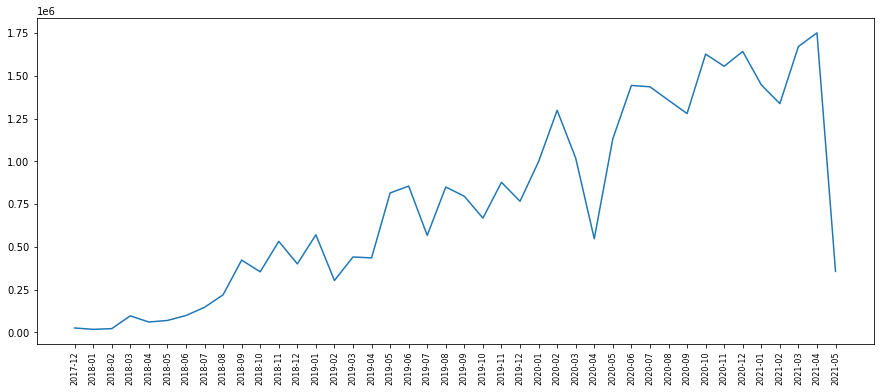

In [68]:
plt.figure(figsize=(15,6))
plt.plot(monthlysales['month_year'], monthlysales['sale_price'],)
plt.xticks(rotation= 'vertical', size= 8)
plt.show()

In [223]:
newfigures = monthlysales.loc[34:39]
newfigures

,month_year,sale_price
34,2020-10,1628131.0
35,2020-11,1557146.0
36,2020-12,1643870.0
37,2021-01,1448378.0
38,2021-02,1338626.0
39,2021-03,1672899.0


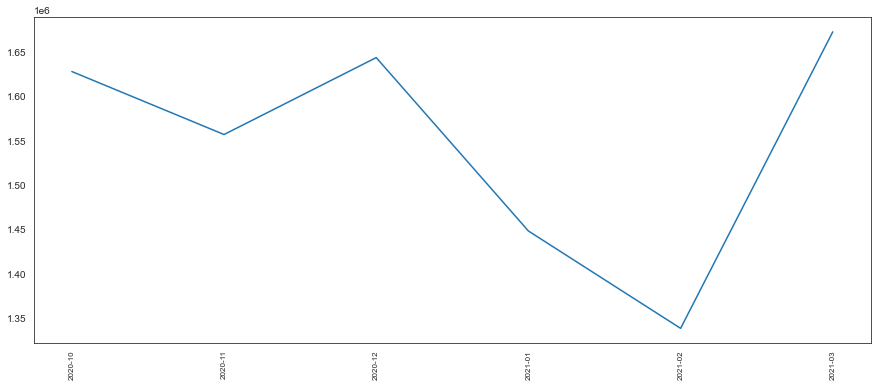

In [224]:
plt.figure(figsize=(15,6))
plt.plot(newfigures['month_year'], newfigures['sale_price'],)
plt.xticks(rotation= 'vertical', size= 8)
plt.show()

<H6>Findings - The sales figure has risen steadily through the past 3 years of the company's operational period as seen in the figure one of sales trend, which gives a clear picture of the company's growth. Further examining the sales figures, the 1st quarter of 2021 is not so appealing on charts in terms of sales compared to the previous quarter.

<H2> 3. Analysis of Profit made

In [226]:
profit = df_copy.groupby('month_year').sum()['profit'].reset_index()
profit

,month_year,profit
0,2017-12,0.00
1,2018-01,300.00
2,2018-02,0.00
3,2018-03,0.00
4,2018-04,0.00
5,2018-05,-295.00
6,2018-06,200.00
7,2018-07,-760.00
8,2018-08,-470.00
9,2018-09,27220.95


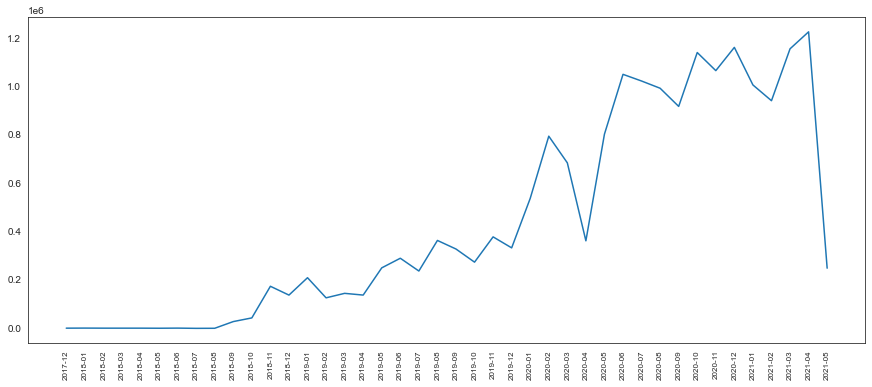

In [227]:
plt.figure(figsize=(15,6))
plt.plot(profit['month_year'], profit['profit'],)
plt.xticks(rotation= 'vertical', size= 8)
plt.show()

In [229]:
recent_profit = profit.loc[34:39]
recent_profit

,month_year,profit
34,2020-10,1139822.35
35,2020-11,1064968.65
36,2020-12,1161087.00
37,2021-01,1005756.32
38,2021-02,940589.57
39,2021-03,1155185.07


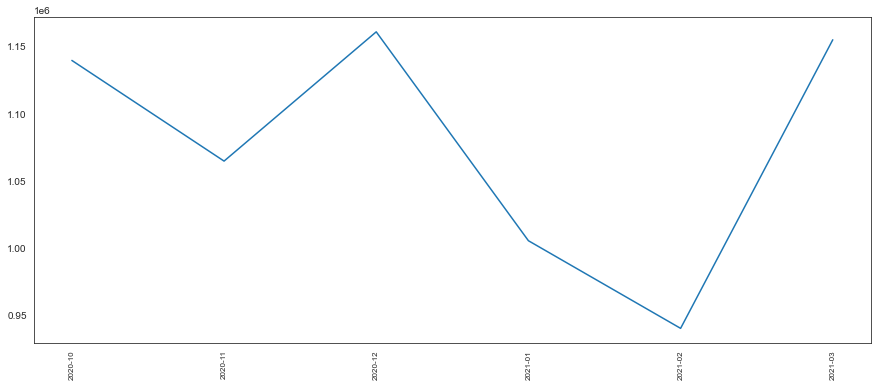

In [230]:
plt.figure(figsize=(15,6))
plt.plot(recent_profit['month_year'], recent_profit['profit'],)
plt.xticks(rotation= 'vertical', size= 8)
plt.show()

<H6> Findings - Though the company generated revenue through sales it did not see any profit until the 3rd quarter of 2018, it has been making profit after that as an be seen in the line trend. Similarly to the sales when compared with the previous quarter the profit has also dipped in the 1st quarter of 2021 along with the sales.

<H2> 4. Analysis by order type/category

In [78]:
ordertypesale = df_copy.groupby('order_type').sum()['sale_price'].reset_index()
ordertypesale

,order_type,sale_price
0,CONSULTATION,87926.00
1,PRODUCT,8815591.02
2,REGIMEN,23437169.44
3,REPLACEMENT_PRODUCT,0.00


<AxesSubplot:xlabel='count', ylabel='order_type'>

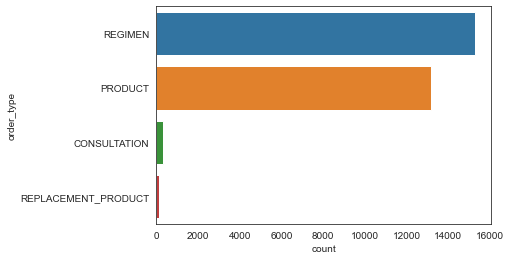

In [217]:
sns.countplot(y='order_type', data= df_copy)

<H6> Findings - 
    The highest revenue is brought in by the service provided in the form of skin and hair regimen followed by products sold, as seen in the chart above

<H3> 5. Age distribution

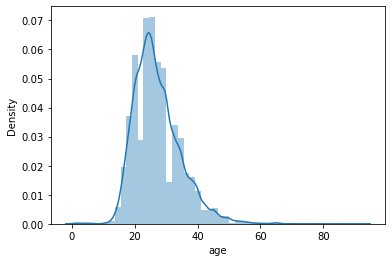

In [126]:
sns.distplot(df_copy.age,)
plt.show()

In [220]:
highsale_age = df_copy.groupby('age').sum()['sale_price'].reset_index()
highsale_age.sort_values('sale_price', ascending=False)

,age,sale_price
31,25.00,2177254.00
30,24.00,2050959.00
33,26.00,1924376.00
28,23.00,1898655.51
38,30.00,1801560.00
34,27.00,1658946.00
35,28.00,1652805.00
26,22.00,1635756.00
22,20.00,1629615.51
23,21.00,1585217.00


<H6> Findings - The highest spending consumer falls within the age group of 25 to 30 as can be seen in the above chart and table, the company needs to focus on this age group and target their efforts towards acquiring these customers

<H3> 6. Sales volume by payment type

In [120]:
preference = df_copy.groupby('payment_type').sum()['sale_price'].reset_index()
preference

,payment_type,sale_price
0,COD,24328548.46
1,ONLINE,8004297.00


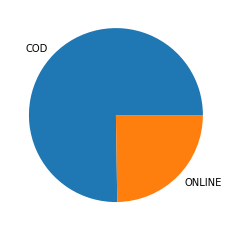

In [130]:
values = [24328548.46, 8004297.00]
vlabel = ['COD', 'ONLINE']

plt.pie(values,labels=vlabel)
plt.show()

<H6> Findings - Almost 75% of the customers are prefering the pay via Cash-on-Delivery option. The marketing and sales efforts can be focused accordingly

<H3> 7. Sales volume by concern

In [213]:
concern = df_copy.groupby('concern').sum()['sale_price'].reset_index()
concern.sort_values('sale_price', ascending=False)

,concern,sale_price
30,unknown,20678240.46
0,ACNE_OR_PIMPLES,2458459.00
18,NO_CONCERN,1698166.00
7,DARK_SPOTS_OR_MARK,1458408.00
19,PIGMENTATION,1394983.00
15,HAIR_FALL,1085772.00
9,DULL_SKIN,475707.00
20,PRE_WEDDING_FACE,417423.00
24,SOMETHING_ELSE,410197.00
1,ACNE_SCARS,299869.00


In [205]:
fil1 = df_copy[df_copy.concern== 'ACNE_OR_PIMPLES']

In [212]:
Acne_cases_agewise = fil1.age.value_counts()
Acne_cases_agewise

20.0    252
23.0    243
24.0    225
25.0    208
28.0    172
21.0    155
19.0    148
18.0    143
22.0    139
26.0    139
27.0    105
17.0     98
30.0     85
29.0     78
32.0     72
16.0     61
35.0     38
31.0     37
34.0     33
33.0     31
40.0     24
15.0     22
39.0     19
38.0     17
14.0     11
36.0     11
37.0      9
41.0      8
13.0      4
54.0      3
42.0      3
11.0      3
56.0      2
49.0      2
43.0      1
12.0      1
61.0      1
47.0      1
Name: age, dtype: int64

<H6> Findings - The first chart shows the revenue in detail from the patients who come with these specific concerns, considering "Acne or Pimple", one of the known concerns recorded in the database contributes significantly in the revenue. Further analysis on the past data of "Acne or Pimple" concern says that, the average customer with this concern lies within the age group of 18-25